# Analyse: comparison between CD4+ T-Helferzellen und CD8+ T-Suppressorzellen, Caco-2 Darm Krebszellen

In [1]:
from tfcomb import CombObj
genome_path="../testdaten/hg19_masked.fa"
motif_path="../testdaten/HOCOMOCOv11_HUMAN_motifs.txt"
result_path="./results/"

Using saved objects from market basket analysis from pkl files for CD4+, CD8+ and Caco-2 cells using complete results of TF. Saving results from market basket analysis in objects. 

In [2]:
CD4_object= CombObj().from_pickle(f"{result_path}CD4+_enhancers_complete.pkl")
CD4_object.prefix = "CD4+"

CD8_object = CombObj().from_pickle(f"{result_path}CD8+_enhancers_complete.pkl")
CD8_object.prefix = "CD8+"

Caco2_object = CombObj().from_pickle(f"{result_path}Caco-2_enhancers_complete.pkl")
Caco2_object.prefix = "Caco-2"

Showing found rules of TF in each cell line

In [3]:
print(f"CD4+_complete: {CD4_object}")
print(f"CD8+_complete: {CD8_object}")
print(f"Caco-2+_complete: {Caco2_object}")

CD4+_complete: <CombObj: 311769 TFBS (401 unique names) | Market basket analysis: 160372 rules>
CD8+_complete: <CombObj: 962548 TFBS (401 unique names) | Market basket analysis: 160789 rules>
Caco-2+_complete: <CombObj: 516025 TFBS (401 unique names) | Market basket analysis: 160745 rules>


Comparing rules of TF of cell line objects

In [4]:
compare_objCD4_CD8 = CD4_object.compare(CD8_object)
compare_objCD4_Caco2 = CD4_object.compare(Caco2_object)
compare_objCD8_Caco2 = CD8_object.compare(Caco2_object)

INFO: Calculating foldchange for contrast: CD4+ / CD8+
INFO: The calculated log2fc's are found in the rules table (<DiffCombObj>.rules)
INFO: Calculating foldchange for contrast: CD4+ / Caco-2
INFO: The calculated log2fc's are found in the rules table (<DiffCombObj>.rules)
INFO: Calculating foldchange for contrast: CD8+ / Caco-2
INFO: The calculated log2fc's are found in the rules table (<DiffCombObj>.rules)


## Results Differential analysis of CD4+ and CD8+

Results of differential analysis are found in compare_objCD4_CD8.rules. The table shows the rules of TF that distinguish strongly in occurence. The duplicates in the results are removed with simplify rules

##### JUN-FOSL2:bei Vergleich deutlich bei CD4+ zelle vorgefunden -> in Kombi wird LIF, Leukämiehemmender Faktor freigesetzt, ein Zytokin, ellwachstum durch Ausdifferenzierung hemmt -> passt, weil CD4+ T-Helferzellen sind, bei Caco Zellen ist Tendenz auch zu sehen, Caco Zellen sollten keine Zytokine freisetzen
##### FOS-JUN: found in literature 
##### JUn-JUNB: found in literature 

In [5]:
#compare_objCD4_CD8.simplify_rules()
compare_objCD4_CD8.rules

,TF1,TF2,CD4+_cosine,CD8+_cosine,CD4+/CD8+_cosine_log2fc,CD4+/CD8+_cosine_log2fc_pvalue,CD4+/CD8+_cosine_log2fc_pvalue_adj
AHR-ATF6,AHR,ATF6,0.033026,0.139711,-1.304316,1.278780e-11,2.050806e-06
ATF6-AHR,ATF6,AHR,0.033026,0.139711,-1.304316,1.278780e-11,2.050806e-06
RFX3-RXRB,RFX3,RXRB,0.029594,0.089801,-0.903453,4.023027e-248,6.451809e-243
RXRB-RFX3,RXRB,RFX3,0.029594,0.089801,-0.903453,4.023027e-248,6.451809e-243
NR3C1-TFEB,NR3C1,TFEB,0.015293,0.058167,-0.833117,2.014481e-08,3.230664e-03
...,...,...,...,...,...,...,...
FOS-FOSL2,FOS,FOSL2,0.361287,0.144311,1.124337,4.573829e-11,7.335141e-06
JUN-JUNB,JUN,JUNB,0.382696,0.153419,1.129647,2.709107e-06,4.344650e-01
JUNB-JUN,JUNB,JUN,0.382696,0.153419,1.129647,2.709107e-06,4.344650e-01
JUN-FOS,JUN,FOS,0.376444,0.149213,1.139924,1.769082e-11,2.837113e-06


In [6]:
#simplyfied rules
compare_objCD4_CD8.simplify_rules()
compare_objCD4_CD8.rules


,TF1,TF2,CD4+_cosine,CD8+_cosine,CD4+/CD8+_cosine_log2fc,CD4+/CD8+_cosine_log2fc_pvalue,CD4+/CD8+_cosine_log2fc_pvalue_adj
AHR-ATF6,AHR,ATF6,0.033026,0.139711,-1.304316,1.278780e-11,2.050806e-06
RFX3-RXRB,RFX3,RXRB,0.029594,0.089801,-0.903453,4.023027e-248,6.451809e-243
NR3C1-TFEB,NR3C1,TFEB,0.015293,0.058167,-0.833117,2.014481e-08,3.230664e-03
CTCFL-AHR,CTCFL,AHR,0.050248,0.119755,-0.826933,7.006403e-08,1.123631e-02
RFX3-THRB,RFX3,THRB,0.024469,0.073211,-0.816538,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
JUN-FOSL2,JUN,FOSL2,0.374479,0.151570,1.115187,4.578891e-06,7.343259e-01
FOS-JUNB,FOS,JUNB,0.370528,0.148826,1.122216,2.124190e-11,3.406606e-06
FOSL2-FOS,FOSL2,FOS,0.361287,0.144311,1.124337,4.573829e-11,7.335141e-06
JUN-JUNB,JUN,JUNB,0.382696,0.153419,1.129647,2.709107e-06,4.344650e-01


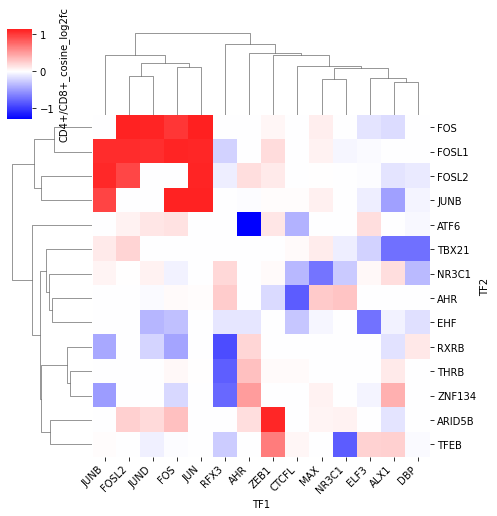

In [7]:
#simplified heatmap
compare_objCD4_CD8.plot_heatmap()

#### Plots of co occuring TF

INFO: Selecting rules for contrast: ('CD4+', 'CD8+')
INFO: measure_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of rules using thresholds


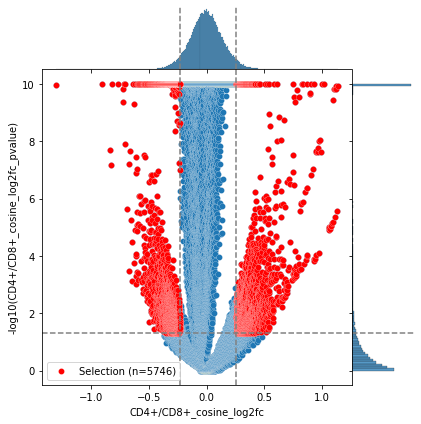

In [9]:
selectionCD4_CD8 = compare_objCD4_CD8.select_rules()

INFO: Selecting rules for contrast: ('CD4+', 'CD8+')
INFO: measure_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of rules using thresholds


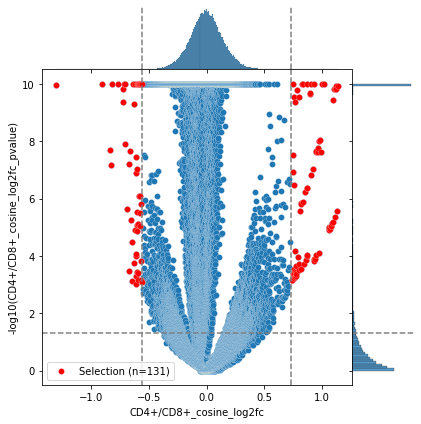

In [40]:
selectionCD4_CD8 = compare_objCD4_CD8.select_rules(measure_threshold_percent=0.00001)

INFO: Finished! The network is found within <CombObj>.network.


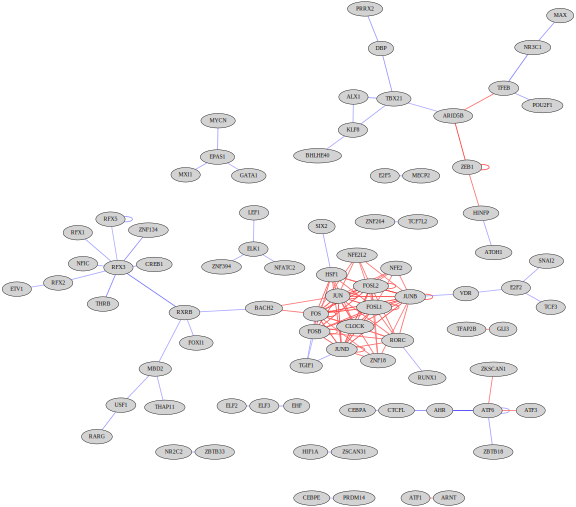

In [41]:
selectionCD4_CD8.plot_network()

In [12]:
selectionCD4_CD8.rules.tail(20)


,TF1,TF2,CD4+_cosine,CD8+_cosine,CD4+/CD8+_cosine_log2fc,CD4+/CD8+_cosine_log2fc_pvalue,CD4+/CD8+_cosine_log2fc_pvalue_adj
JUN-FOSB,JUN,FOSB,0.332833,0.148667,0.984329,8.966082e-09,0.001438
ZEB1-ZEB1,ZEB1,ZEB1,0.221768,0.091896,0.991252,2.283475e-08,0.003662
FOS-FOSB,FOS,FOSB,0.321946,0.140919,1.002166,0.000000e+00,0.000000
FOS-FOS,FOS,FOS,0.184780,0.071173,1.018561,0.000000e+00,0.000000
JUND-FOSL1,JUND,FOSL1,0.354048,0.149417,1.058524,1.256502e-05,1.000000
JUNB-JUND,JUNB,JUND,0.355220,0.149605,1.061380,9.996492e-06,1.000000
JUNB-FOSL1,JUNB,FOSL1,0.367472,0.155170,1.063647,1.075731e-05,1.000000
FOSL2-FOSL1,FOSL2,FOSL1,0.359564,0.150670,1.069070,1.162336e-05,1.000000
FOSL2-JUND,FOSL2,JUND,0.350209,0.145398,1.075395,9.018591e-06,1.000000
JUND-JUN,JUND,JUN,0.360945,0.150296,1.076892,8.836608e-06,1.000000


## Results Differential analysis of CD4+ and Caco2

Results of differential analysis are found in compare_objCD4_Caco2.rules. The table shows the rules of TF that distinguish stronly in occurence. The duplicates in the results are removed with simplify rules

##### JUN-FOSL2: bei Vergleich deutlich bei CD4+ zelle vorgefunden -> in Kombi wird LIF, Leukämiehemmender Faktor freigesetzt, ein Zytokin, ellwachstum durch Ausdifferenzierung hemmt -> passt, weil CD4+ T-Helferzellen sind, bei Caco Zellen ist Tendenz auch zu sehen, Caco Zellen sollten keine Zytokine freisetzen

In [13]:
compare_objCD4_Caco2.simplify_rules()
compare_objCD4_Caco2.rules

,TF1,TF2,CD4+_cosine,Caco-2_cosine,CD4+/Caco-2_cosine_log2fc,CD4+/Caco-2_cosine_log2fc_pvalue,CD4+/Caco-2_cosine_log2fc_pvalue_adj
GATA4-GATA4,GATA4,GATA4,0.030295,0.107739,-1.064328,0.000000e+00,0.000000e+00
GATA4-GATA6,GATA4,GATA6,0.072700,0.189290,-1.020303,1.396387e-198,2.238883e-193
GATA6-HNF4A,GATA6,HNF4A,0.028214,0.094861,-0.976318,8.023120e-117,1.286379e-111
NFE2L2-HNF1B,NFE2L2,HNF1B,0.024647,0.084542,-0.938771,5.939899e-10,9.523678e-05
AHR-E2F4,AHR,E2F4,0.013010,0.059236,-0.896110,2.584517e-06,4.143860e-01
...,...,...,...,...,...,...,...
JUNB-FOS,JUNB,FOS,0.398536,0.092399,1.722680,0.000000e+00,0.000000e+00
FOSB-HSF1,FOSB,HSF1,0.276742,0.054164,1.742808,8.981573e-13,1.440052e-07
JUND-HSF1,JUND,HSF1,0.263027,0.047601,1.782553,2.000025e-13,3.206720e-08
JUN-HSF1,JUN,HSF1,0.268230,0.048008,1.800421,8.006142e-14,1.283657e-08


#### Plots of co occuring TF

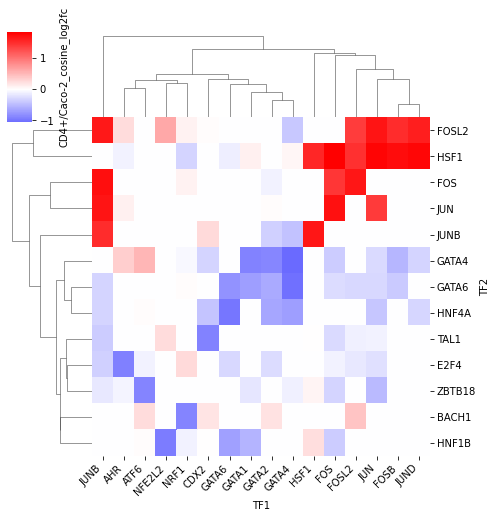

In [14]:
compare_objCD4_Caco2.plot_heatmap()

INFO: Selecting rules for contrast: ('CD4+', 'Caco-2')
INFO: measure_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of rules using thresholds


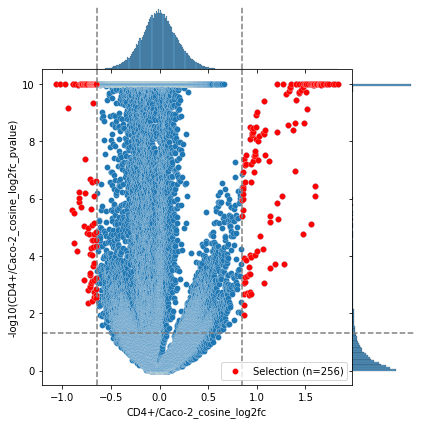

In [44]:
selectionCD4_Caco2 = compare_objCD4_Caco2.select_rules(measure_threshold_percent=0.0001)

INFO: Finished! The network is found within <CombObj>.network.


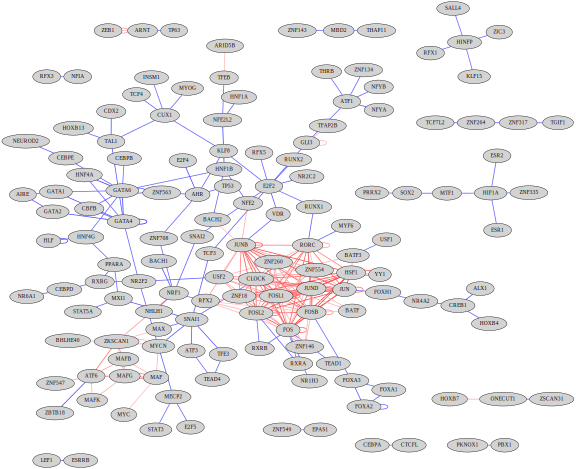

In [45]:
selectionCD4_Caco2.plot_network()


## Results Differential analysis of CD8+ and Caco2

Results of differential analysis are found in compare_objCD8_Caco2.rules. The table shows the rules of TF that distinguish stronnly in occurence. The duplicates in the results are removed with simplify rules

##### GATA6 : Involved in gene regulation specifically in the gastric epithelium. May regulate genes that protect epithelial cells from bacterial infection.

In [17]:
compare_objCD8_Caco2.simplify_rules()
compare_objCD8_Caco2.rules

,TF1,TF2,CD8+_cosine,Caco-2_cosine,CD8+/Caco-2_cosine_log2fc,CD8+/Caco-2_cosine_log2fc_pvalue,CD8+/Caco-2_cosine_log2fc_pvalue_adj
BACH1-NRF1,BACH1,NRF1,0.050893,0.163243,-1.150467,1.486243e-22,2.388942e-17
GATA6-GATA4,GATA6,GATA4,0.067671,0.192057,-1.099238,0.000000e+00,0.000000e+00
GATA6-GATA2,GATA6,GATA2,0.043122,0.137583,-1.084152,0.000000e+00,0.000000e+00
GATA6-HNF4A,GATA6,HNF4A,0.025395,0.095441,-1.036810,3.517720e-88,5.654277e-83
HNF4A-GATA4,HNF4A,GATA4,0.028672,0.095558,-0.968758,1.473569e-278,2.368570e-273
...,...,...,...,...,...,...,...
ONECUT1-MEIS1,ONECUT1,MEIS1,0.094881,0.030594,0.922446,1.603548e-06,2.577495e-01
HSF1-HSF1,HSF1,HSF1,0.086815,0.022157,1.014650,4.783067e-07,7.688159e-02
HOXB7-ONECUT1,HOXB7,ONECUT1,0.093723,0.024350,1.041380,1.228772e-07,1.975091e-02
ATF6-ATF6,ATF6,ATF6,0.095657,0.020169,1.156980,1.885124e-09,3.030092e-04


#### Plots of co occuring TF

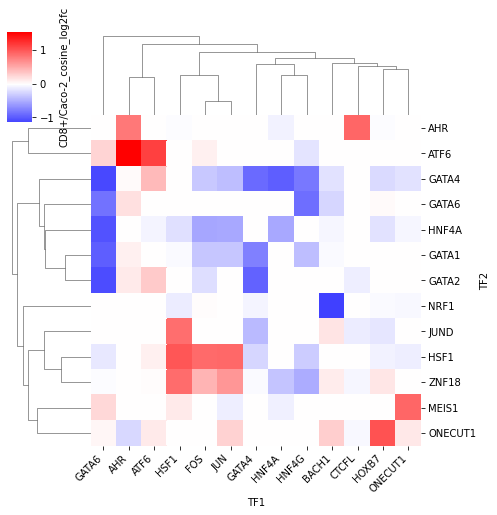

In [18]:
compare_objCD8_Caco2.plot_heatmap()

INFO: Selecting rules for contrast: ('CD8+', 'Caco-2')
INFO: measure_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of rules using thresholds


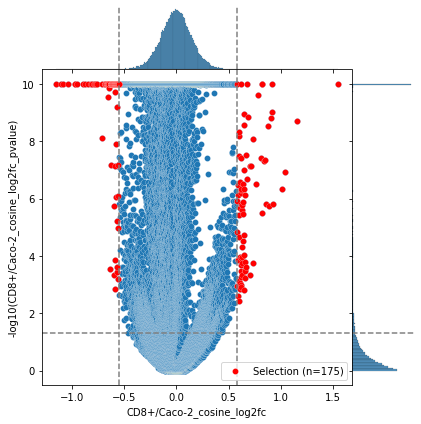

In [47]:
selectionCD8_Caco2 = compare_objCD8_Caco2.select_rules(measure_threshold_percent=0.0001)

INFO: Finished! The network is found within <CombObj>.network.


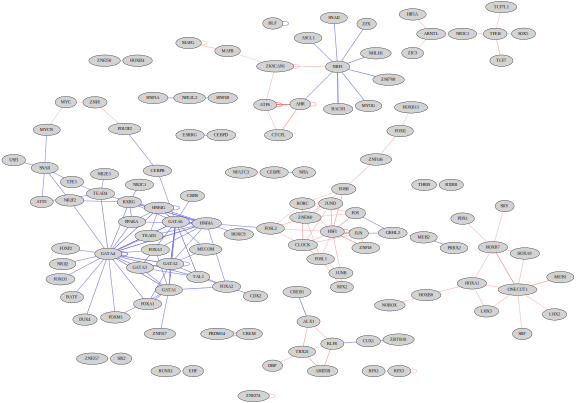

In [48]:
selectionCD8_Caco2.plot_network()